<a href="https://colab.research.google.com/github/LucasJordi/forecastbucha/blob/main/Previs%C3%A3o_sobressalentes_Bucha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Importando bibliotecas

---



In [ ]:
!pip install croston

In [ ]:
import pandas as pd, numpy as np
import math
import random
import pandas_datareader as web
from croston import croston
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Preparando os dados


In [ ]:
caminho=('/content/drive/MyDrive/sobressalentes/bucha.csv')
df=pd.read_csv(caminho)
df=df.fillna(0)
X=df.drop(columns=['Consumo'])
y=df['Consumo']
model=DecisionTreeClassifier()
model.fit(X,y)


df

,Ano,Semana,Trimestre,Consumo
0,2010,1,1,0.0
1,2010,2,1,0.0
2,2010,3,1,0.0
3,2010,4,1,0.0
4,2010,5,1,0.0
...,...,...,...,...
516,2018,49,4,0.0
517,2018,50,4,0.0
518,2018,51,4,0.0
519,2018,52,4,0.0


In [ ]:
nn=df[(df['Consumo']!=0)]
nn
nn.loc[nn['Ano'] == nn['Ano'].shift(1), 'Tempo entre demanda(Semanas)'] =nn['Semana']-nn['Semana'].shift(1)
nn.loc[nn['Ano'] >nn['Ano'].shift(1), 'Tempo entre demanda(Semanas)'] = ((52*(nn['Ano']-nn['Ano'].shift(1)))-nn['Semana'].shift(1))+nn['Semana']
nn=nn.fillna(0)


nn['Tempo entre demanda(Semanas)'].values
nn['Consumo'].values
nn

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Ano,Semana,Trimestre,Consumo,Tempo entre demanda(Semanas)
121,2012,18,2,20.0,0.0
131,2012,28,3,54.0,10.0
150,2012,47,4,6.0,19.0
169,2013,14,2,8.0,19.0
178,2013,23,2,10.0,9.0
271,2015,12,1,16.0,93.0
357,2016,46,4,40.0,86.0
433,2017,18,2,8.0,24.0
448,2017,33,3,76.0,15.0
492,2018,25,2,20.0,44.0


#Gráfico de consumo


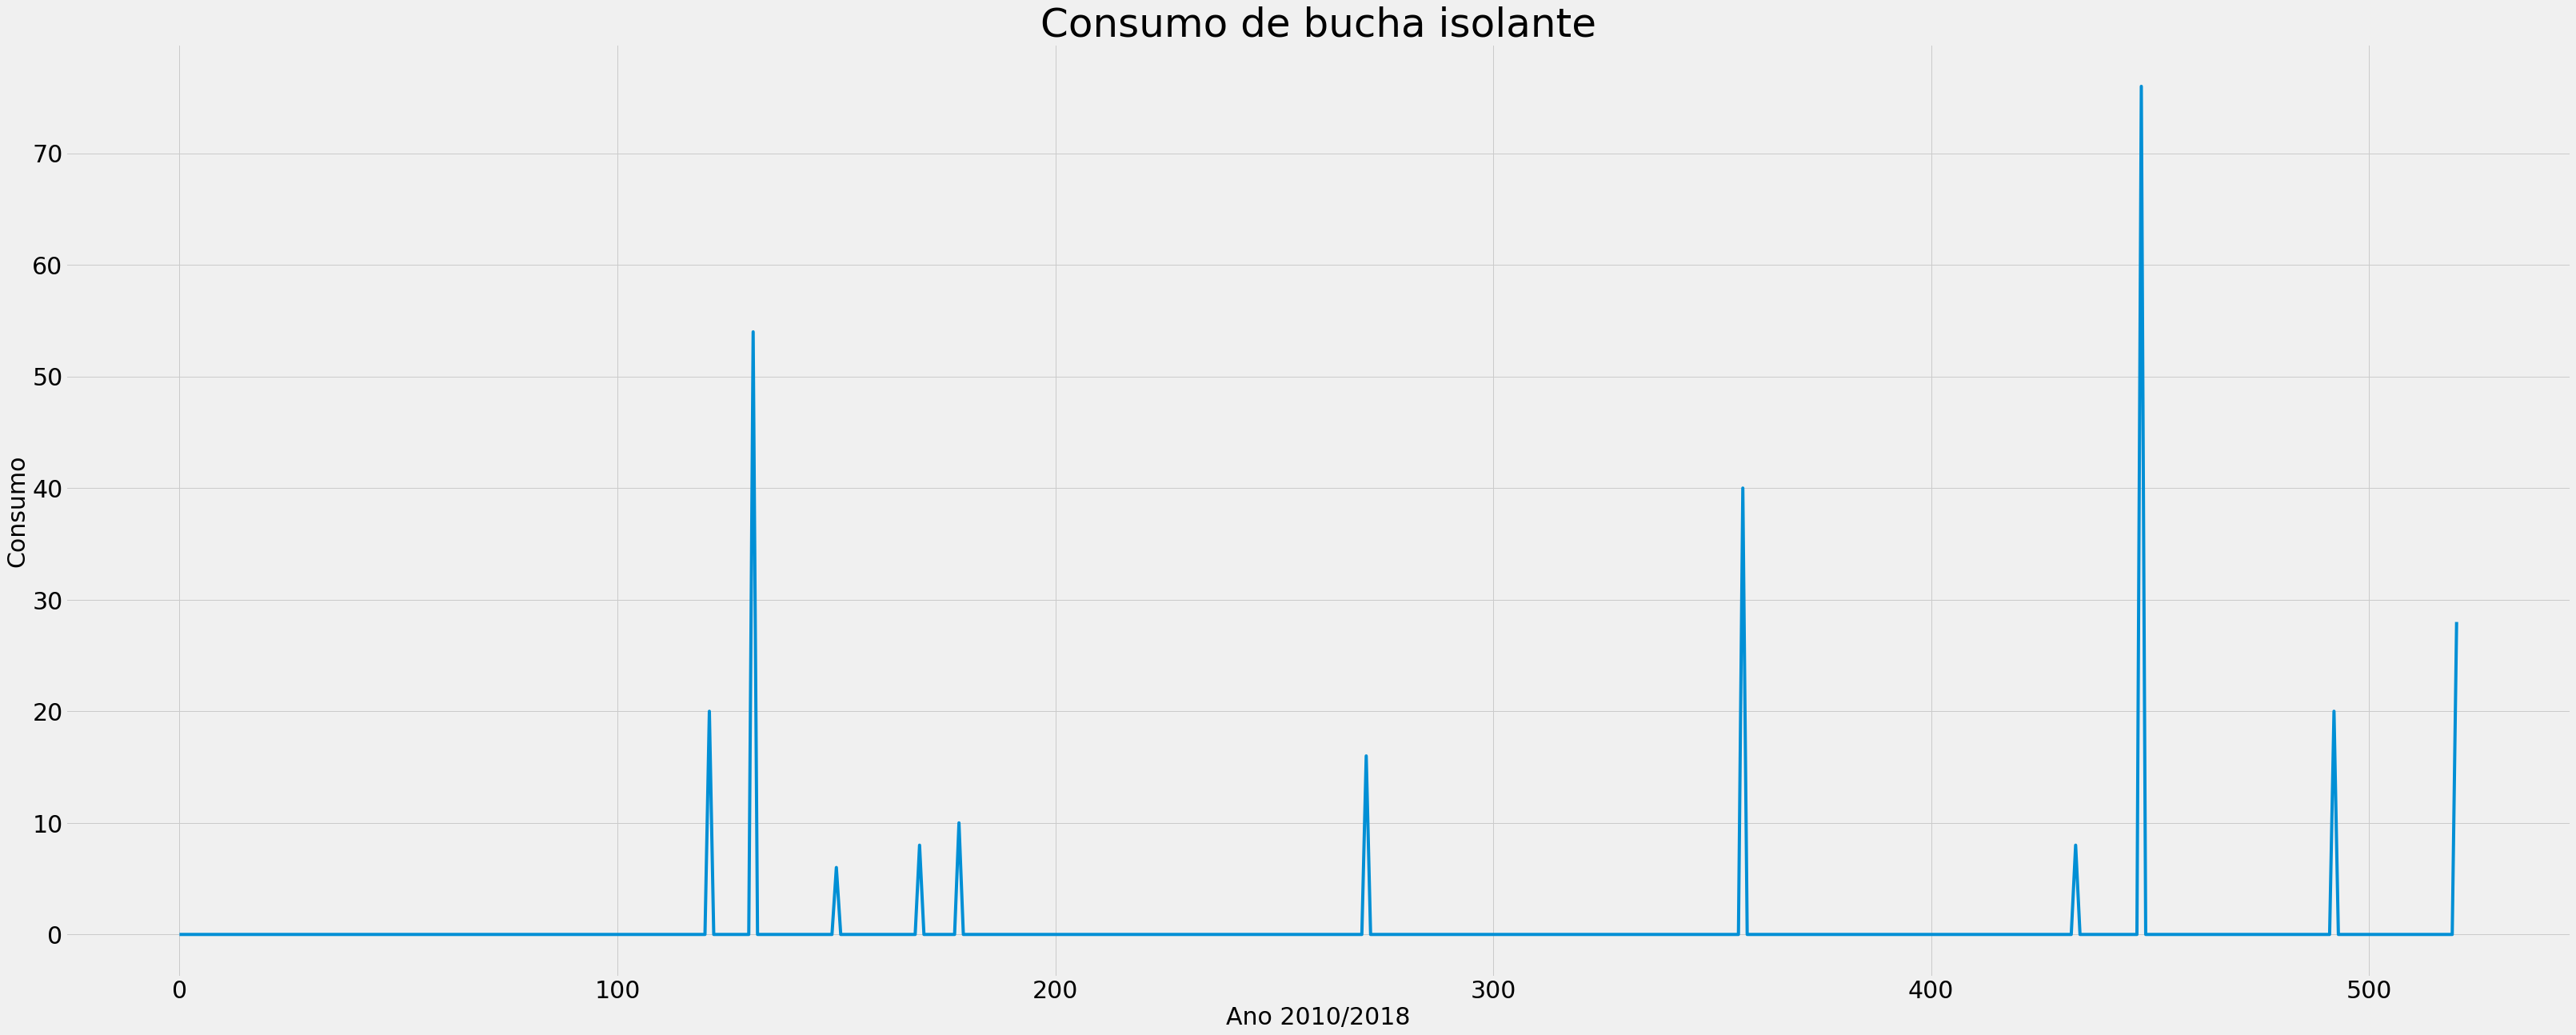

In [ ]:
plt.figure(figsize=([50,20]))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.plot(df['Consumo'])

plt.title("Consumo de bucha isolante",fontsize=50)




plt.xlabel('Ano 2010/2018',fontsize=30)
plt.ylabel('Consumo',fontsize=30)

plt.show()


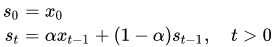

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


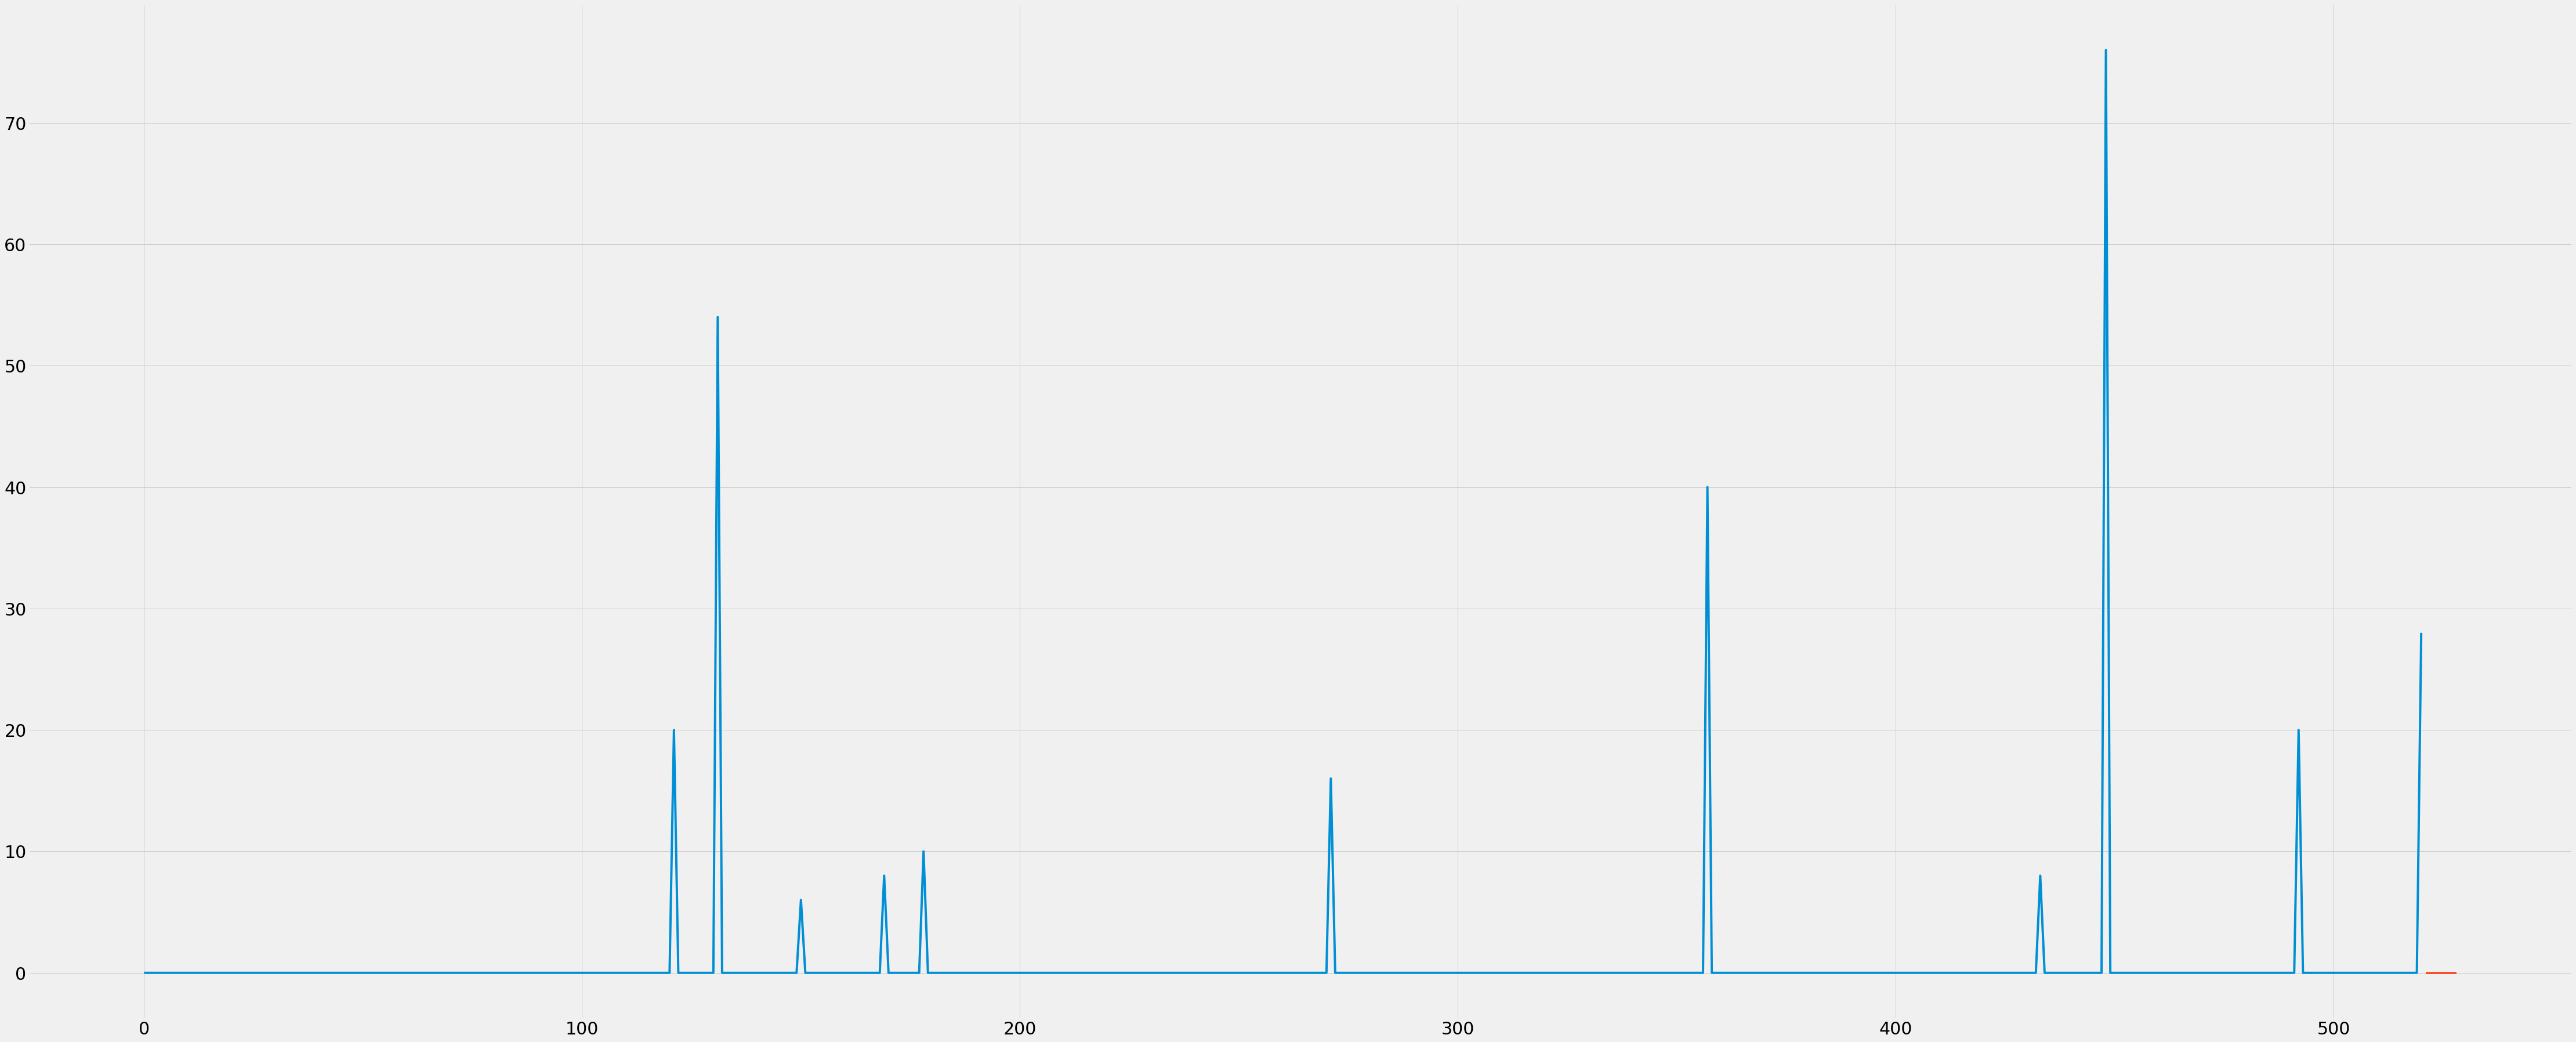

In [ ]:

a=0.7
v=random.randint(1, 100)
df['Exponential smoothing']=0
df['Exponential smoothing'][0]=0
df['MA_2']=df['Consumo'].rolling(window=2).mean()
df['MA_5']=df['Consumo'].rolling(window=5).mean()
df['MA_9']=df['Consumo'].rolling(window=9).mean()
f=[]

for x in range(1,len(df)):
  df['Exponential smoothing'][x]=a*df['Consumo'][x-1]+(a-1)*df['Exponential smoothing'][x-1]
  m=a*df['Consumo'][x-1]+(a-1)*df['Exponential smoothing'][x-1]
  f.append(m)

  
for x in range(1,10):
  
  b=a*df['Consumo'][x-1]+(a-1)*df['Exponential smoothing'][x-1]  
  f.append(b)
  
f=pd.DataFrame(f)



plt.figure(figsize=(70,30))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.plot(df['Consumo'])
plt.plot(f[len(df):])



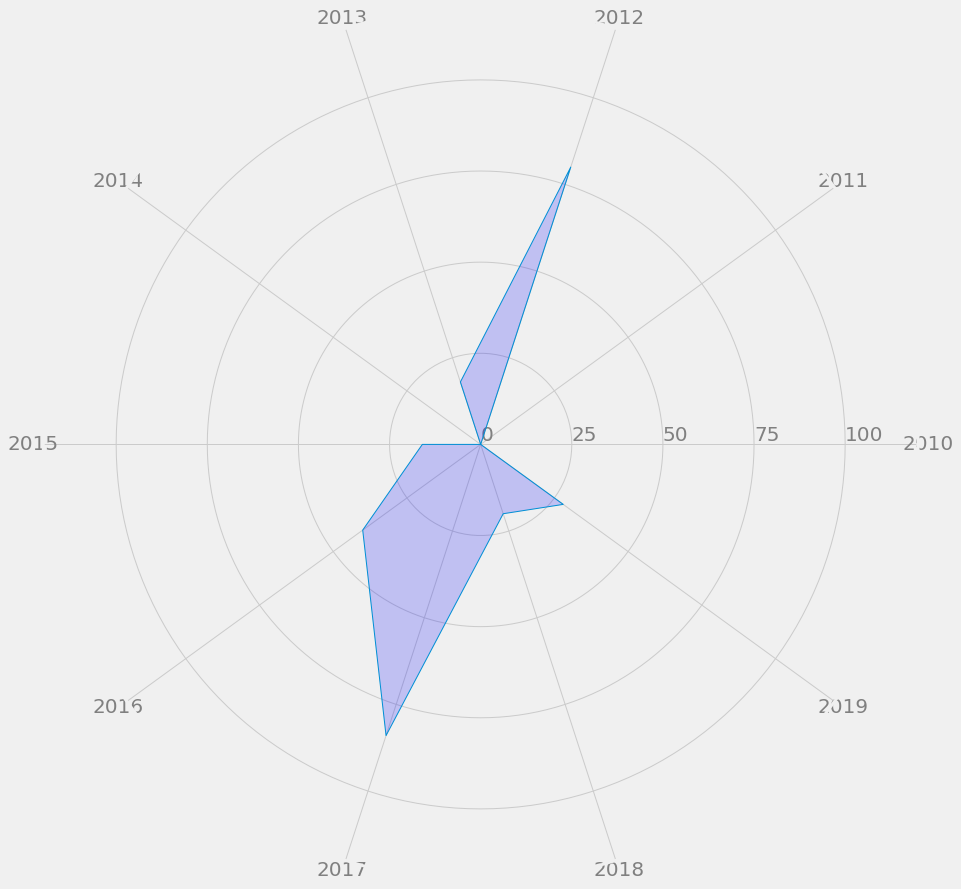

In [ ]:
#Radar


# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
group=df.groupby(['Ano']).sum()
dt = pd.DataFrame({
'group': ['A'],
'2010': group.filter(like='2010', axis=0)['Consumo'].values,
'2011': group.filter(like='2011', axis=0)['Consumo'].values,
'2012': group.filter(like='2012', axis=0)['Consumo'].values,
'2013': group.filter(like='2013', axis=0)['Consumo'].values,
'2014': group.filter(like='2014', axis=0)['Consumo'].values,
'2015': group.filter(like='2015', axis=0)['Consumo'].values,
'2016': group.filter(like='2016', axis=0)['Consumo'].values,
'2017': group.filter(like='2017', axis=0)['Consumo'].values,
'2018': group.filter(like='2018', axis=0)['Consumo'].values,
'2019': group.filter(like='2019', axis=0)['Consumo'].values,
})
 
# number of variable
categories=list(dt)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=dt.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
plt.figure(figsize=(15,15))
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=20)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,25,50,75,100], ["0","25","50","75","100"], color="grey", size=20)
plt.ylim(0,120)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.2)

In [ ]:
group

,Semana,Trimestre,Consumo,Exponential smoothing,MA_2,MA_5,MA_9
Ano,,,,,,,
2010,1378,130,0.0,0,0.0,0.0,0.000000
2011,1378,130,0.0,0,0.0,0.0,0.000000
2012,1378,130,80.0,43,80.0,80.0,78.000000
2013,1378,130,18.0,9,18.0,18.0,20.000000
2014,1378,130,0.0,0,0.0,0.0,0.000000
2015,1378,130,16.0,8,16.0,16.0,16.000000
2016,2756,260,40.0,22,40.0,40.0,40.000000
2017,1378,130,84.0,45,84.0,84.0,84.000000
2018,1378,130,20.0,11,20.0,20.0,20.000000


In [ ]:
mm=df.groupby(['Ano','Trimestre']).sum()
mm




Semana  Consumo  Exponential smoothing  MA_2  MA_5       MA_9
Ano  Trimestre                                                               
2010 1              91      0.0                      0   0.0   0.0   0.000000
     2             260      0.0                      0   0.0   0.0   0.000000
     3             429      0.0                      0   0.0   0.0   0.000000
     4             598      0.0                      0   0.0   0.0   0.000000
2011 1              91      0.0                      0   0.0   0.0   0.000000
     2             260      0.0                      0   0.0   0.0   0.000000
     3             429      0.0                      0   0.0   0.0   0.000000
     4             598      0.0                      0   0.0   0.0   0.000000
2012 1              91      0.0                      0   0.0   0.0   0.000000
     2             260     20.0                     11  20.0  20.0  20.000000
     3             429     54.0                     29  54.0  54.0  54.000000
     4             598      6.0                      3   6.0   6.0   4.000000
2013 1              91      0.0                      0   0.0   0.0   2.000000
     2             260     18.0                      9  18.0  16.0  12.444444
     3             429      0.0                      0   0.0   2.0   5.555556
     4             598      0.0                      0   0.0   0.0   0.000000
2014 1              91      0.0                      0   0.0   0.0   0.000000
     2             260      0.0                      0   0.0   0.0   0.000000
     3             429      0.0                      0   0.0   0.0   0.000000
     4             598      0.0                      0   0.0   0.0   0.000000
2015 1              91     16.0                     11  16.0   6.4   3.555556
     2             260      0.0                     -3   0.0   9.6  12.444444
     3             429      0.0                      0   0.0   0.0   0.000000
     4             598      0.0                      0   0.0   0.0   0.000000
2016 1             182      0.0                      0   0.0   0.0   8.888889
     2             520      0.0                      0   0.0   0.0   0.000000
     3             858      0.0                      0   0.0   0.0   0.000000
     4            1196     40.0                     22  40.0  40.0  31.111111
2017 1              91      0.0                      0   0.0   0.0   0.000000
     2             260      8.0                      4   8.0   8.0   8.000000
     3             429     76.0                     41  76.0  76.0  59.111111
     4             598      0.0                      0   0.0   0.0  16.888889
2018 1              91      0.0                      0   0.0   0.0   0.000000
     2             260     20.0                     14  20.0   8.0   4.444444
     3             429      0.0                     -3   0.0  12.0  15.555556
     4             598      0.0                      0   0.0   0.0   0.000000
2019 1               1     28.0                      0  14.0   5.6   3.111111

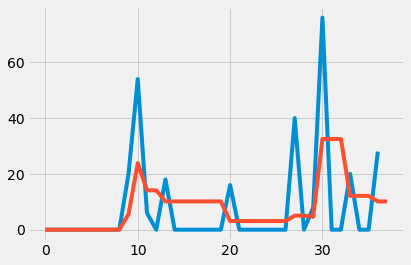

In [ ]:
import numpy as np
import random
from croston import croston
import matplotlib.pyplot as plt


a = np.zeros(50)
val = np.array(random.sample(range(100,200), 10))
idxs = random.sample(range(50), 10)

ts = np.insert(a, idxs, val)

fit_pred = croston.fit_croston(mm['Consumo'], 1,'original')

yhat = np.concatenate([fit_pred['croston_fittedvalues'], fit_pred['croston_forecast']])


plt.plot(mm['Consumo'].values)
plt.plot(yhat)
plt.show()